In [61]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import math

# Constant real, geometric imag

In [47]:
asinh_grid = np.linspace(0, 5, 5)
delta = asinh_grid[1] - asinh_grid[0]
reals = np.sinh(asinh_grid)
imags = np.cosh(asinh_grid) * delta

In [51]:
plot_xs = np.arange(100).reshape(-1, 1)
even = (plot_xs - reals) / (np.square(plot_xs - reals) + np.square(imags))
odd = reals / (np.square(plot_xs - reals) + np.square(imags))

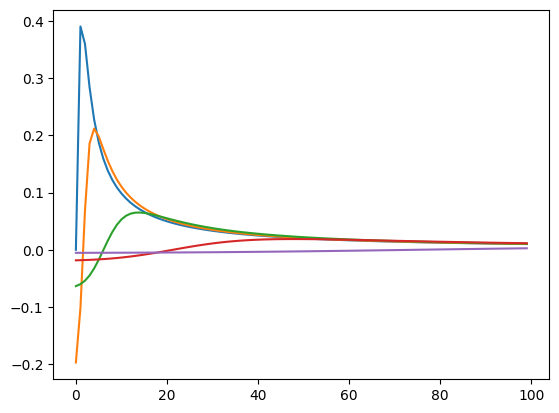

In [52]:
plt.plot(plot_xs, even)
plt.show()

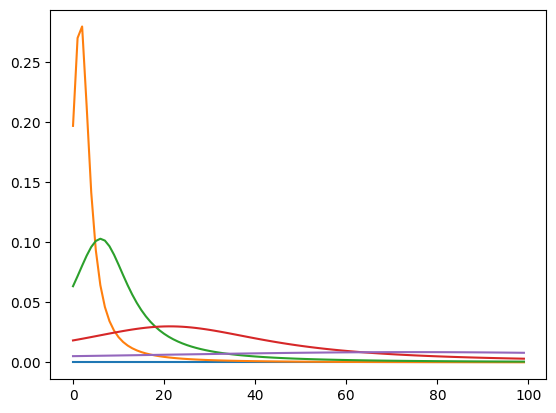

In [53]:
plt.plot(plot_xs, odd)
plt.show()

# Vandermonde and Gram matrix properties

In [126]:
def complex_pole_vander(xs, num_poles=5, scale_min=0, scale_max=10000, sigma=10):
    scale_min = math.asinh(scale_min / sigma)
    scale_max = math.asinh(scale_max / sigma)
    asinh_grid = np.linspace(scale_min, scale_max, num_poles)

    delta = asinh_grid[1] - asinh_grid[0]
    reals = sigma * np.sinh(asinh_grid)
    imags = sigma * np.cosh(asinh_grid) * delta

    xs = xs.reshape(-1, 1)
    even = (xs - reals) / (np.square(xs - reals) + np.square(imags))
    odd = reals / (np.square(xs - reals) + np.square(imags))

    even *= np.hypot(reals, imags)
    odd *= np.hypot(reals, imags)

    return np.concatenate([even, odd], axis=1)

In [129]:
xs = np.arange(10000)
vander = complex_pole_vander(xs, num_poles=20)

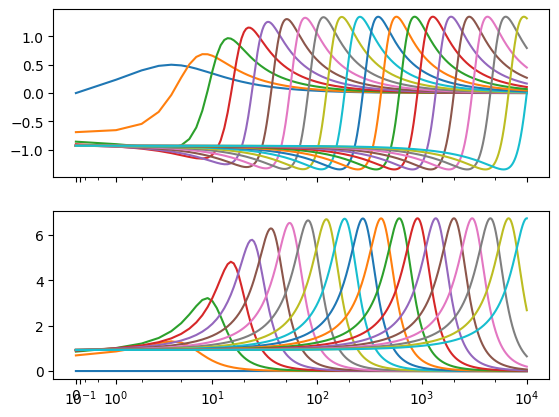

In [131]:
fig, axs = plt.subplots(2, 1, sharex=True)
axs[0].plot(xs, vander[:, :20])
axs[1].plot(xs, vander[:, 20:])
axs[0].set_xscale('asinh')
axs[1].set_xscale('asinh')
plt.show()